# Proyek Analisis Data: [E-Commerce Public Dataset]
- **Nama:** [Tomy Ivan Sugiharto]
- **Email:** [tomyivans86@gmail.com]
- **ID Dicoding:** tomy_ivans

## Menentukan Pertanyaan Bisnis

- Bagaimana Performa Penjualan dan Revenue Perusahaan dalam Beberapa Bulan Terakhir?
- Produk Apa yang Paling Banyak dan Paling Sedikit Terjual?
- Bagimana Demografi Pengiriman yang Kita Miliki?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
customers_df = pd.read_csv("https://raw.githubusercontent.com/tomyivansugiharto/datascience/main/submission/data/olist_customers_dataset.csv")
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [3]:
order_items_df = pd.read_csv("https://github.com/tomyivansugiharto/datascience/raw/main/submission/data/olist_order_items_dataset.csv")
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [4]:
order_payments_df = pd.read_csv("https://raw.githubusercontent.com/tomyivansugiharto/datascience/main/submission/dataset/olist_order_payments_dataset.csv")
order_payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [5]:
orders_df = pd.read_csv("https://raw.githubusercontent.com/tomyivansugiharto/datascience/main/submission/dataset/olist_orders_dataset.csv")
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [6]:
products_df = pd.read_csv("https://raw.githubusercontent.com/tomyivansugiharto/datascience/main/submission/dataset/olist_products_dataset.csv")
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [7]:
sellers_df = pd.read_csv("https://raw.githubusercontent.com/tomyivansugiharto/datascience/main/submission/dataset/olist_sellers_dataset.csv")
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


### Assessing Data

--- Customer Data ---

In [8]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [9]:
customers_df.isna().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [10]:
print("Jumlah duplikasi: ", customers_df.duplicated().sum())
customers_df.describe()

Jumlah duplikasi:  0


,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


--- Orders Data ---

In [11]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [12]:
order_items_df.isna().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [13]:
print("Jumlah duplikasi: ", order_items_df.duplicated().sum())
order_items_df.describe()

Jumlah duplikasi:  0


,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


In [14]:
order_payments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [15]:
order_payments_df.isna().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

In [16]:
print("Jumlah duplikasi: ", order_payments_df.duplicated().sum())
order_payments_df.describe()

Jumlah duplikasi:  0


,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


In [17]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [18]:
orders_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [19]:
print("Jumlah duplikasi: ", orders_df.duplicated().sum())
orders_df.describe()

Jumlah duplikasi:  0


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


--- Products Data ---

In [20]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [21]:
products_df.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [22]:
print("Jumlah duplikasi: ", products_df.duplicated().sum())
products_df.describe()

Jumlah duplikasi:  0


,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


--- Sellers Data ---

In [23]:
sellers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [24]:
sellers_df.isna().sum()

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

In [25]:
print("Jumlah duplikasi: ", sellers_df.duplicated().sum())
sellers_df.describe()

Jumlah duplikasi:  0


,seller_zip_code_prefix
count,3095.000000
mean,32291.059451
std,32713.453830
min,1001.000000
25%,7093.500000
50%,14940.000000
75%,64552.500000
max,99730.000000


<h1>Ringkasan</h1>
<table>
  <tr>
    <th>Dataframe</th>
    <th>Tipe Data</th>
    <th>Missing Value</th>
    <th>Duplicated Data</th>
    <th>Inaccurate Value</th>
  </tr>

  <tr>
    <td>customers_df</td>
    <td>-</td>
    <td>-</td>
    <td>-</td>
    <td>-</td>
  </tr>

  <tr>
    <td>order_items_df</td>
    <td>-</td>
    <td>-</td>
    <td>-</td>
    <td>-</td>
  </tr>

  <tr>
    <td>order_payments_df</td>
    <td>-</td>
    <td>-</td>
    <td>-</td>
    <td>-</td>
  </tr>

  <tr>
    <td>orders_df</td>
    <td>
      Terdapat kesalahan tipe data untuk order_delivered_carrier_date,<br> order_delivered_customer_date & order_estimated_delivery_date.
    </td>
    <td>
      <li>160 missing value pada kolom order_approved_at<br></li>
      <li>1783 missing value pada kolom order_delivered_carrier_date<br></li>
      <li>2965 missing value pada kolom order_delivered_customer_date<br></li>
    </td>
    <td>-</td>
    <td>-</td>
  </tr>

  <tr>
    <td>product_df</td>
    <td>-</td>
    <td>
      <li>610 missing value pada kolom product_category_name<br></li>
      <li>610 missing value pada kolom product_name_length<br></li>
      <li>610 missing value pada kolom product_description_length<br></li>
      <li>610 missing value pada kolom product_photos_qty<br></li>
      <li>2 missing value pada kolom product_weight_g<br></li>
      <li>2 missing value pada kolom product_length_cm<br></li>
      <li>2 missing value pada kolom product_height_cm<br></li>
      <li>2 missing value pada kolom product_width_cm<br></li>
    </td>
    <td>-</td>
    <td>-</td>
  </tr>

  <tr>
    <td>sellers_df</td>
    <td>-</td>
    <td>-</td>
    <td>-</td>
    <td>-</td>
  </tr>
</table>

### Cleaning Data

--- Orders Data ---

In [26]:
datetime_columns = ["order_purchase_timestamp", "order_approved_at", "order_delivered_carrier_date", "order_delivered_customer_date", "order_estimated_delivery_date"]

for column in datetime_columns:
    orders_df[column] = pd.to_datetime(orders_df[column])

In [27]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


In [28]:
orders_df[orders_df.order_approved_at.isna()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
1130,00b1cb0320190ca0daa2c88b35206009,3532ba38a3fd242259a514ac2b6ae6b6,canceled,2018-08-28 15:26:39,NaT,NaT,NaT,2018-09-12
1801,ed3efbd3a87bea76c2812c66a0b32219,191984a8ba4cbb2145acb4fe35b69664,canceled,2018-09-20 13:54:16,NaT,NaT,NaT,2018-10-17
1868,df8282afe61008dc26c6c31011474d02,aa797b187b5466bc6925aaaa4bb3bed1,canceled,2017-03-04 12:14:30,NaT,NaT,NaT,2017-04-10
2029,8d4c637f1accf7a88a4555f02741e606,b1dd715db389a2077f43174e7a675d07,canceled,2018-08-29 16:27:49,NaT,NaT,NaT,2018-09-13
2161,7a9d4c7f9b068337875b95465330f2fc,7f71ae48074c0cfec9195f88fcbfac55,canceled,2017-05-01 16:12:39,NaT,NaT,NaT,2017-05-30
...,...,...,...,...,...,...,...,...
97696,5a00b4d35edffc56b825c3646a99ba9d,6a3bdf004ca96338fb5fad1b8d93c2e6,canceled,2017-07-02 15:38:46,NaT,NaT,NaT,2017-07-25
98415,227c804e2a44760671a6a5697ea549e4,62e7477e75e542243ee62a0ba73f410f,canceled,2017-09-28 15:02:56,NaT,NaT,NaT,2017-10-16
98909,e49e7ce1471b4693482d40c2bd3ad196,e4e7ab3f449aeb401f0216f86c2104db,canceled,2018-08-07 11:16:28,NaT,NaT,NaT,2018-08-10
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaT,NaT,NaT,2018-10-01


In [29]:
orders_df['order_approved_at'].fillna(method='bfill', inplace=True)
orders_df['order_delivered_carrier_date'].fillna(method='bfill', inplace=True)
orders_df['order_delivered_customer_date'].fillna(method='bfill', inplace=True)

In [30]:
orders_df.isna().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64

In [31]:
orders_df.describe()

,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99441
mean,2017-12-31 08:43:12.776581120,2017-12-31 17:42:41.392674816,2018-01-04 20:36:01.832332544,2018-01-14 12:18:59.495218176,2018-01-24 03:08:37.730111232
min,2016-09-04 21:15:19,2016-09-15 12:16:38,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-09-30 00:00:00
25%,2017-09-12 14:46:19,2017-09-12 22:10:19,2017-09-15 22:52:52,2017-09-25 22:08:43,2017-10-03 00:00:00
50%,2018-01-18 23:04:36,2018-01-19 09:53:17,2018-01-24 13:22:13,2018-02-02 18:05:43,2018-02-15 00:00:00
75%,2018-05-04 15:42:16,2018-05-04 20:15:17,2018-05-08 13:20:00,2018-05-15 22:42:00,2018-05-25 00:00:00
max,2018-10-17 17:30:18,2018-09-03 17:40:06,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-11-12 00:00:00


--- Products Data ---

In [32]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [33]:
products_df[products_df.product_category_name.isna()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
105,a41e356c76fab66334f36de622ecbd3a,NaN,NaN,NaN,NaN,650.0,17.0,14.0,12.0
128,d8dee61c2034d6d075997acef1870e9b,NaN,NaN,NaN,NaN,300.0,16.0,7.0,20.0
145,56139431d72cd51f19eb9f7dae4d1617,NaN,NaN,NaN,NaN,200.0,20.0,20.0,20.0
154,46b48281eb6d663ced748f324108c733,NaN,NaN,NaN,NaN,18500.0,41.0,30.0,41.0
197,5fb61f482620cb672f5e586bb132eae9,NaN,NaN,NaN,NaN,300.0,35.0,7.0,12.0
...,...,...,...,...,...,...,...,...,...
32515,b0a0c5dd78e644373b199380612c350a,NaN,NaN,NaN,NaN,1800.0,30.0,20.0,70.0
32589,10dbe0fbaa2c505123c17fdc34a63c56,NaN,NaN,NaN,NaN,800.0,30.0,10.0,23.0
32616,bd2ada37b58ae94cc838b9c0569fecd8,NaN,NaN,NaN,NaN,200.0,21.0,8.0,16.0
32772,fa51e914046aab32764c41356b9d4ea4,NaN,NaN,NaN,NaN,1300.0,45.0,16.0,45.0


In [34]:
products_df["product_category_name"].fillna(value="Prefer not to say", inplace=True)

In [35]:
mean_value_product_name_lenght = products_df["product_name_lenght"].mean()
products_df["product_name_lenght"].fillna(mean_value_product_name_lenght, inplace=True)

mean_value_product_description_lenght = products_df["product_description_lenght"].mean()
products_df["product_description_lenght"].fillna(mean_value_product_description_lenght, inplace=True)

mean_value_product_photos_qty = products_df["product_photos_qty"].mean()
products_df["product_photos_qty"].fillna(mean_value_product_photos_qty, inplace=True)

mean_value_product_weight_g = products_df["product_weight_g"].mean()
products_df["product_weight_g"].fillna(mean_value_product_weight_g, inplace=True)

mean_value_product_length_cm = products_df["product_length_cm"].mean()
products_df["product_length_cm"].fillna(mean_value_product_length_cm, inplace=True)

mean_value_product_height_cm = products_df["product_height_cm"].mean()
products_df["product_height_cm"].fillna(mean_value_product_height_cm, inplace=True)

mean_value_product_width_cm = products_df["product_width_cm"].mean()
products_df["product_width_cm"].fillna(mean_value_product_width_cm, inplace=True)

In [36]:
products_df.isna().sum()

product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64

In [37]:
products_df.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32951.000000,32951.000000,32951.000000,32951.000000,32951.000000,32951.000000,32951.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.150458,629.208849,1.720614,4281.908773,16.913945,13.637140,12.078681
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,344.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,604.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,961.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


## Exploratory Data Analysis (EDA)

### Merge Orders Data Prosessing

In [38]:
# Orders x Order Items
orders_order_items_df = pd.merge(
    left=orders_df,
    right=order_items_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
orders_order_items_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,1.0,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,1.0,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,1.0,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72


In [39]:
# All data Orders
all_orders_df = pd.merge(
    left=orders_order_items_df,
    right=order_payments_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
all_orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,1.0,credit_card,1.0,18.12
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,3.0,voucher,1.0,2.00
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,2.0,voucher,1.0,18.59
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,1.0,boleto,1.0,141.46
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,1.0,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,1.0,credit_card,3.0,179.12


In [40]:
delivery_time = all_orders_df["order_delivered_customer_date"] - all_orders_df["order_delivered_carrier_date"]
delivery_time = delivery_time.apply(lambda x: x.total_seconds())
all_orders_df["delivery_order_time"] = round(delivery_time/86400)

### Explore Customers Data

In [41]:
customers_df.describe(include="all")

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


Perusahaan memiliki pelanggan sebanyak 99441 orang dengan frekuensi 15540 kota dan 41746 negara.

In [42]:
customers_df.groupby(by="customer_city").customer_id.nunique().sort_values(ascending=False)

customer_city
sao paulo         15540
rio de janeiro     6882
belo horizonte     2773
brasilia           2131
curitiba           1521
                  ...  
ibiara                1
rio espera            1
rio dos indios        1
rio dos cedros        1
lagoao                1
Name: customer_id, Length: 4119, dtype: int64

Pelanggan terbanyak pada persebaran kota di kota sao paulo sebanyak 15540 dan rio de janeiro sebanyak 6882.

In [43]:
customers_df.groupby(by="customer_state").customer_id.nunique().sort_values(ascending=False)

customer_state
SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
PE     1652
CE     1336
PA      975
MT      907
MA      747
MS      715
PB      536
PI      495
RN      485
AL      413
SE      350
TO      280
RO      253
AM      148
AC       81
AP       68
RR       46
Name: customer_id, dtype: int64

Selain itu, pelanggan paling banyak berasal dari negara bagian SP.

In [44]:
customer_id_in_order_df = orders_df.customer_id.tolist()
customers_df["status"] = customers_df["customer_id"].apply(lambda x: "Active" if x in customer_id_in_order_df else "Non Active")
customers_df.sample(10)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,status
24810,ec65abb5dcb1d10fd068a914a1b483fb,2dcc3f3bcffa402ae206b4f5c0b6074f,11070,santos,SP,Active
26876,8be927d8fb3b9fa474e1afcac281cdcb,4e480c651903b26e987ad098dd01cfd3,55660,bezerros,PE,Active
891,9aad6db5643769b3d802a87328ec31e2,463d8425827e81d905edf86f9c231eef,28909,cabo frio,RJ,Active
14312,8569e9f2797775eb7a3c4263e868ddad,f4d632afad2a733913d5d41b16620db5,13212,jundiai,SP,Active
55183,f838e842c0f8bda43a21d146deb6f087,1c0b80f13c209893ef36ff95cc2041c1,79102,campo grande,MS,Active
35010,fd521f49383a26f40d6ea3d6eeeab735,47a352064d390999021cb7fc8128a6c3,38600,paracatu,MG,Active
64418,640f09e17a30fc5ef879ffb54d1bfcd3,86c245ffe05ee211d1a254995de11a6a,7097,guarulhos,SP,Active
84433,328bb667dcb2db6801de1b493bb9ffdc,212de5904c4fe864c3a66f26d3043d97,60336,fortaleza,CE,Active
23485,76ee5f8f54e9d3a881e3c55c3d2196c0,41a1779a38fe1420e35e21da6be8c900,32667,betim,MG,Active
71094,893c3461da11001c1a1d9bf9afd13aa5,d56879f3551bb3b35caa7950ef7e7dd1,85170,pinhao,PR,Active


In [45]:
customers_df.groupby(by="status").customer_id.count()

status
Active    99441
Name: customer_id, dtype: int64

Terlihat pada pivot table di atas, terdapat seluruh pelanggan yang pernah melakukan transaksi. Ini tentunya merupakan kabar baik karena 100% pelanggan pernah melakukan order sebelumnya.

In [46]:
# Orders x Customers
orders_customers_df = pd.merge(
    left=all_orders_df,
    right=customers_df,
    how="left",
    left_on="customer_id",
    right_on="customer_id"
)
orders_customers_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,payment_sequential,payment_type,payment_installments,payment_value,delivery_order_time,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,status
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1.0,87285b34884572647811a353c7ac498a,...,1.0,credit_card,1.0,18.12,6.0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,Active
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1.0,87285b34884572647811a353c7ac498a,...,3.0,voucher,1.0,2.00,6.0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,Active
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1.0,87285b34884572647811a353c7ac498a,...,2.0,voucher,1.0,18.59,6.0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,Active
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1.0,595fac2a385ac33a80bd5114aec74eb8,...,1.0,boleto,1.0,141.46,12.0,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,Active
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,1.0,aa4383b373c6aca5d8797843e5594415,...,1.0,credit_card,3.0,179.12,9.0,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,Active


In [47]:
orders_customers_df.groupby(by="customer_city").order_id.nunique().sort_values(ascending=False).reset_index().head()

,customer_city,order_id
0,sao paulo,15540
1,rio de janeiro,6882
2,belo horizonte,2773
3,brasilia,2131
4,curitiba,1521


Diketahui bahwa kota sao paulo merupakan kota yang memiliki jumlah order terbanyak.

In [48]:
orders_customers_df.groupby(by="customer_state").order_id.nunique().sort_values(ascending=False).reset_index().head()

,customer_state,order_id
0,SP,41746
1,RJ,12852
2,MG,11635
3,RS,5466
4,PR,5045


Diketahui bahwa negara SP, RJ, dan MG merupakan negara yang memiliki order terbanyak.

In [49]:
orders_customers_df.describe()

,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,price,freight_value,payment_sequential,payment_installments,payment_value,delivery_order_time,customer_zip_code_prefix
count,118434,118434,118434,118434,118434,117604.000000,117604.000000,117604.000000,118431.000000,118431.000000,118431.000000,118434.000000,118434.000000
mean,2017-12-30 04:00:24.559636480,2017-12-30 13:48:48.597024256,2018-01-03 16:18:10.475226880,2018-01-13 06:04:10.959961088,2018-01-23 00:31:38.941182208,1.195920,120.822849,20.045551,1.094207,2.937398,172.849395,9.537295,35034.264392
min,2016-09-04 21:15:19,2016-09-15 12:16:38,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-09-30 00:00:00,1.000000,0.850000,0.000000,1.000000,0.000000,0.000000,-644.000000,1003.000000
25%,2017-09-11 12:53:55.249999872,2017-09-11 22:18:59,2017-09-14 23:57:44,2017-09-25 12:24:47,2017-10-02 00:00:00,1.000000,39.900000,13.080000,1.000000,1.000000,60.860000,4.000000,11310.000000
50%,2018-01-17 17:57:56.500000,2018-01-18 00:55:33.500000,2018-01-23 19:21:44.500000,2018-02-01 17:40:48,2018-02-14 00:00:00,1.000000,74.900000,16.290000,1.000000,2.000000,108.200000,7.000000,24240.000000
75%,2018-05-03 19:05:01,2018-05-04 02:51:42,2018-05-07 15:39:30,2018-05-15 15:50:41,2018-05-25 00:00:00,1.000000,134.900000,21.190000,1.000000,4.000000,189.245000,12.000000,58464.500000
max,2018-10-17 17:30:18,2018-09-03 17:40:06,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-11-12 00:00:00,21.000000,6735.000000,409.680000,29.000000,24.000000,13664.080000,583.000000,99990.000000
std,NaN,NaN,NaN,NaN,NaN,0.697721,184.477367,15.861351,0.728290,2.774164,268.259831,24.195984,29819.290218


In [50]:
orders_customers_df["delivery_order_group"] = orders_customers_df.delivery_order_time.apply(lambda x: "Fast" if x <= 7 else ("Slow" if x > 12 else "Normal"))
orders_customers_df.groupby(by="delivery_order_group").order_id.nunique().sort_values(ascending=False)

delivery_order_group
Fast      53643
Slow      23652
Normal    22146
Name: order_id, dtype: int64

Berdasarkan hasil tersebut diketahui bahwa pengiriman tercepat yang paling banyak berasal dari kelompok pengiriman Fast.

### Explore Orders Data

In [51]:
order_items_df.describe(include="all")

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
count,112650,112650.000000,112650,112650,112650,112650.000000,112650.000000
unique,98666,NaN,32951,3095,93318,NaN,NaN
top,8272b63d03f5f79c56e9e4120aec44ef,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,2017-07-21 18:25:23,NaN,NaN
freq,21,NaN,527,2033,21,NaN,NaN
mean,NaN,1.197834,NaN,NaN,NaN,120.653739,19.990320
std,NaN,0.705124,NaN,NaN,NaN,183.633928,15.806405
min,NaN,1.000000,NaN,NaN,NaN,0.850000,0.000000
25%,NaN,1.000000,NaN,NaN,NaN,39.900000,13.080000
50%,NaN,1.000000,NaN,NaN,NaN,74.990000,16.260000
75%,NaN,1.000000,NaN,NaN,NaN,134.900000,21.150000


In [52]:
order_payments_df.describe(include="all")

,order_id,payment_sequential,payment_type,payment_installments,payment_value
count,103886,103886.000000,103886,103886.000000,103886.000000
unique,99440,NaN,5,NaN,NaN
top,fa65dad1b0e818e3ccc5cb0e39231352,NaN,credit_card,NaN,NaN
freq,29,NaN,76795,NaN,NaN
mean,NaN,1.092679,NaN,2.853349,154.100380
std,NaN,0.706584,NaN,2.687051,217.494064
min,NaN,1.000000,NaN,0.000000,0.000000
25%,NaN,1.000000,NaN,1.000000,56.790000
50%,NaN,1.000000,NaN,1.000000,100.000000
75%,NaN,1.000000,NaN,4.000000,171.837500


In [53]:
orders_df.describe(include="all")

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99441,99441,99441,99441
unique,99441,99441,8,NaN,NaN,NaN,NaN,NaN
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,NaN,NaN,NaN,NaN,NaN
freq,1,1,96478,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,2017-12-31 08:43:12.776581120,2017-12-31 17:42:41.392674816,2018-01-04 20:36:01.832332544,2018-01-14 12:18:59.495218176,2018-01-24 03:08:37.730111232
min,NaN,NaN,NaN,2016-09-04 21:15:19,2016-09-15 12:16:38,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-09-30 00:00:00
25%,NaN,NaN,NaN,2017-09-12 14:46:19,2017-09-12 22:10:19,2017-09-15 22:52:52,2017-09-25 22:08:43,2017-10-03 00:00:00
50%,NaN,NaN,NaN,2018-01-18 23:04:36,2018-01-19 09:53:17,2018-01-24 13:22:13,2018-02-02 18:05:43,2018-02-15 00:00:00
75%,NaN,NaN,NaN,2018-05-04 15:42:16,2018-05-04 20:15:17,2018-05-08 13:20:00,2018-05-15 22:42:00,2018-05-25 00:00:00
max,NaN,NaN,NaN,2018-10-17 17:30:18,2018-09-03 17:40:06,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-11-12 00:00:00


Dapat diketahui bahwa rata-rata waktu pengiriman sebesar 7 hari dengan nilai maksimum 583 hari dan nilai minimum kurang dari 1 hari.

In [54]:
all_orders_df.groupby(by="order_status").order_item_id.nunique().sort_values(ascending=False)

order_status
delivered      21
canceled        6
processing      6
shipped         6
invoiced        5
approved        2
unavailable     2
created         0
Name: order_item_id, dtype: int64

Diketahui bahwa pengiriman yang terkirim terdapat sebanyak 21 dan yang terbatal sebanyak 6. Hal ini menjadi kabar buruk dan harus menjadi pertimbangan karena hampir 30% dari yang terkirim sebelumnya.

In [55]:
all_orders_df.groupby(by="payment_type").price.nunique().sort_values(ascending=False)

payment_type
credit_card    5383
boleto         2617
voucher        1112
debit_card      657
not_defined       0
Name: price, dtype: int64

Diketahui bahwa pembayaran terbanyak berada pada credit_card sebanyak 5383 dan paling sedikit pada debit_card sebanyak 657.

In [56]:
all_orders_df.groupby(by="order_status").agg({
    "order_id": "nunique",
    "delivery_order_time": "mean",
    "price": ["mean", "min", "max"]
})

order_id delivery_order_time       price                
              nunique                mean        mean    min      max
order_status                                                         
approved            2            9.666667   69.866667  19.85   169.90
canceled          625            5.953020  179.047085   5.53  2649.00
created             5            6.800000         NaN    NaN      NaN
delivered       96478            9.156722  120.081744   0.85  6735.00
invoiced          314            9.600536  169.701159   6.00  1775.90
processing        301            9.762667  169.226160   3.50  1299.99
shipped          1107           47.061044  132.885651   4.99  2150.00
unavailable       609            8.981538  286.812857  35.00  1199.00

### Explore Product Data

In [57]:
products_df.describe(include="all")

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32951,32951,32951.000000,32951.000000,32951.000000,32951.000000,32951.000000,32951.000000,32951.000000
unique,32951,74,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,1e9e8ef04dbcff4541ed26657ea517e5,cama_mesa_banho,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,3029,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,NaN,NaN,10.150458,629.208849,1.720614,4281.908773,16.913945,13.637140,12.078681
min,NaN,NaN,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,NaN,NaN,42.000000,344.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,NaN,NaN,51.000000,604.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,NaN,NaN,57.000000,961.000000,3.000000,1900.000000,38.000000,21.000000,30.000000


In [58]:
# Order Items x Product
order_items_products_df = pd.merge(
    left=order_items_df,
    right=products_df,
    how="left",
    left_on="product_id",
    right_on="product_id"
)
order_items_products_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,moveis_decoracao,59.0,695.0,2.0,3050.0,33.0,13.0,33.0
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumaria,42.0,480.0,1.0,200.0,16.0,10.0,15.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,ferramentas_jardim,59.0,409.0,1.0,3750.0,35.0,40.0,30.0


In [60]:
order_items_products_df.sort_values(by="price", ascending=False)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
3556,0812eb902a67711a1cb742b3cdaa65ae,1,489ae2aa008f021502940f251d4cce7f,e3b4998c7a498169dc7bce44e6bb6277,2017-02-16 20:37:36,6735.00,194.31,utilidades_domesticas,31.0,875.0,2.0,30000.0,60.0,61.0,33.0
112233,fefacc66af859508bf1a7934eab1e97f,1,69c590f7ffc7bf8db97190b6cb6ed62e,80ceebb4ee9b31afb6c6a916a574a1e2,2018-08-02 04:05:13,6729.00,193.21,pcs,50.0,1935.0,4.0,5660.0,54.0,18.0,47.0
107841,f5136e38d1a14a4dbd87dff67da82701,1,1bdf5e6731585cf01aa8169c7028d6ad,ee27a8f15b1dded4d213a468ba4eb391,2017-06-15 02:45:17,6499.00,227.66,artes,28.0,3954.0,2.0,7400.0,47.0,25.0,25.0
74336,a96610ab360d42a2e5335a3998b4718a,1,a6492cc69376c469ab6f61d8f44de961,59417c56835dd8e2e72f91f809cd4092,2017-04-18 13:25:18,4799.00,151.34,eletroportateis,41.0,1780.0,2.0,22600.0,55.0,40.0,40.0
11249,199af31afc78c699f0dbf71fb178d4d4,1,c3ed642d592594bb648ff4a04cee2747,59417c56835dd8e2e72f91f809cd4092,2017-05-09 15:50:15,4690.00,74.34,eletroportateis,59.0,2217.0,2.0,30000.0,50.0,49.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57304,8272b63d03f5f79c56e9e4120aec44ef,8,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.20,7.89,beleza_saude,45.0,231.0,3.0,800.0,21.0,4.0,15.0
57300,8272b63d03f5f79c56e9e4120aec44ef,4,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.20,7.89,beleza_saude,45.0,231.0,3.0,800.0,21.0,4.0,15.0
48625,6e864b3f0ec71031117ad4cf46b7f2a1,1,8a3254bee785a526d548a81a9bc3c9be,96804ea39d96eb908e7c3afdb671bb9e,2018-05-02 20:30:34,0.85,18.23,construcao_ferramentas_construcao,25.0,1041.0,5.0,200.0,16.0,4.0,11.0
27652,3ee6513ae7ea23bdfab5b9ab60bffcb5,1,8a3254bee785a526d548a81a9bc3c9be,96804ea39d96eb908e7c3afdb671bb9e,2018-05-04 03:55:26,0.85,18.23,construcao_ferramentas_construcao,25.0,1041.0,5.0,200.0,16.0,4.0,11.0


In [64]:
order_items_products_df.groupby(by="product_category_name").agg({
    "product_id": "nunique",
    "price": ["mean", "min", "max"]
})

product_id       price                
                             nunique        mean    min      max
product_category_name                                           
Prefer not to say                610  111.999551   3.00  3980.00
agro_industria_e_comercio         74  342.124858  12.99  2990.00
alimentos                         82   57.634137   9.99   274.99
alimentos_bebidas                104   54.602446   6.50   699.90
artes                             55  115.802105   3.50  6499.00
...                              ...         ...    ...      ...
sinalizacao_e_seguranca           93  108.086583   4.50   740.00
tablets_impressao_imagem           9   90.703735  14.90   889.99
telefonia                       1134   71.213978   5.00  2428.00
telefonia_fixa                   116  225.693182   6.00  1790.00
utilidades_domesticas           2335   90.788148   3.06  6735.00

[74 rows x 4 columns]

### Explore Sellers Data

In [66]:
sellers_df.describe(include="all")

,seller_id,seller_zip_code_prefix,seller_city,seller_state
count,3095,3095.000000,3095,3095
unique,3095,NaN,611,23
top,3442f8959a84dea7ee197c632cb2df15,NaN,sao paulo,SP
freq,1,NaN,694,1849
mean,NaN,32291.059451,NaN,NaN
std,NaN,32713.453830,NaN,NaN
min,NaN,1001.000000,NaN,NaN
25%,NaN,7093.500000,NaN,NaN
50%,NaN,14940.000000,NaN,NaN
75%,NaN,64552.500000,NaN,NaN


In [67]:
sellers_products_df = pd.merge(
    left=sellers_df,
    right=order_items_products_df,
    how="left",
    left_on="seller_id",
    right_on="seller_id"
)
sellers_products_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state,order_id,order_item_id,product_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,4a90af3e85dd563884e2afeab1091394,1,ffb64e34a37740dafb6c88f1abd1fa61,2017-08-25 20:50:19,106.20,9.56,esporte_lazer,26.0,417.0,3.0,700.0,43.0,15.0,35.0
1,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,6d953888a914b67350d5bc4d48f2acab,1,f4621f8ad6f54a2e3c408884068be46d,2017-05-11 16:25:11,101.70,15.92,esporte_lazer,27.0,485.0,2.0,600.0,35.0,15.0,28.0
2,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,bc8a5de6abf5b14f98a6135a7fb46731,2,325a06bcce0da45b7f4ecf2797dd40e4,2017-09-05 12:50:19,10.80,2.42,esporte_lazer,44.0,1089.0,1.0,300.0,16.0,5.0,15.0
3,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP,035201c3c82a97f8a25dd6bd5244b2d5,1,1c36a5285f7f3b1ed2637d7c528ce5ff,2017-11-22 04:30:29,89.99,45.09,malas_acessorios,21.0,769.0,4.0,1600.0,55.0,37.0,30.0
4,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP,0504447548229e075dea8441b37b1e2a,1,8852eb03b04ec3268a66e9b696e25f6f,2017-10-06 02:14:42,199.90,21.89,papelaria,30.0,832.0,5.0,2000.0,25.0,55.0,40.0


In [68]:
sellers_products_df.groupby(by="product_category_name").agg({
    "seller_id": "nunique",
    "order_item_id": "sum",
    "price": "sum"
}).sort_values(by="price", ascending=False)

,seller_id,order_item_id,price
product_category_name,,,
beleza_saude,492,11081,1258681.34
relogios_presentes,101,6594,1205005.68
cama_mesa_banho,196,13665,1036988.68
esporte_lazer,481,9932,988048.97
informatica_acessorios,287,9874,911954.32
...,...,...,...
flores,3,37,1110.04
casa_conforto_2,4,39,760.27
cds_dvds_musicais,1,16,730.00


Produk kategori beleza_saude merupakan produk yang paling laris dan juga banyak menyumbang revenue terhadap perusahaan.

## Visualization & Explanatory Analysis

In [70]:
all_df = pd.merge(
    left=sellers_products_df,
    right=orders_customers_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
all_df.head()

,seller_id_x,seller_zip_code_prefix,seller_city,seller_state,order_id,order_item_id_x,product_id_x,shipping_limit_date_x,price_x,freight_value_x,...,payment_type,payment_installments,payment_value,delivery_order_time,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,status,delivery_order_group
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,4a90af3e85dd563884e2afeab1091394,1,ffb64e34a37740dafb6c88f1abd1fa61,2017-08-25 20:50:19,106.20,9.56,...,credit_card,2.0,115.76,1.0,f421a2a66b69dbfe6db0c87845281a90,4661,sao paulo,SP,Active,Fast
1,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,6d953888a914b67350d5bc4d48f2acab,1,f4621f8ad6f54a2e3c408884068be46d,2017-05-11 16:25:11,101.70,15.92,...,credit_card,2.0,117.62,21.0,b4527423469300ee354458e1b5f961be,32223,contagem,MG,Active,Slow
2,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,bc8a5de6abf5b14f98a6135a7fb46731,2,325a06bcce0da45b7f4ecf2797dd40e4,2017-09-05 12:50:19,10.80,2.42,...,credit_card,4.0,158.80,2.0,af0f26435fade1ca984d9affda307199,9310,maua,SP,Active,Fast
3,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,bc8a5de6abf5b14f98a6135a7fb46731,2,325a06bcce0da45b7f4ecf2797dd40e4,2017-09-05 12:50:19,10.80,2.42,...,credit_card,4.0,158.80,2.0,af0f26435fade1ca984d9affda307199,9310,maua,SP,Active,Fast
4,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP,035201c3c82a97f8a25dd6bd5244b2d5,1,1c36a5285f7f3b1ed2637d7c528ce5ff,2017-11-22 04:30:29,89.99,45.09,...,boleto,1.0,135.08,7.0,be1401bbfd64455c798bb4683e915c61,22050,rio de janeiro,RJ,Active,Fast


In [71]:
all_df.groupby(by=["seller_state", "product_category_name"]).agg({
    "order_item_id_x": "sum",
    "price_x": "sum"
})

order_item_id_x    price_x
seller_state product_category_name                               
AC           livros_tecnicos                         1     267.00
AM           telefonia                               3    1177.00
BA           alimentos_bebidas                      57    6536.09
             bebes                                   5     849.50
             bebidas                                 1     145.90
...                                                ...        ...
SP           sinalizacao_e_seguranca               689   25907.16
             tablets_impressao_imagem              109    7914.82
             telefonia                            8192  232313.39
             telefonia_fixa                        969  187893.96
             utilidades_domesticas               17374  589455.56

[513 rows x 2 columns]

### Pertanyaan 1: Bagaimana Performa Penjualan dan Revenue Perusahaan dalam Beberapa Bulan Terakhir?

In [72]:
all_df.describe()

,seller_zip_code_prefix,order_item_id_x,price_x,freight_value_x,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,...,order_delivered_customer_date,order_estimated_delivery_date,order_item_id_y,price_y,freight_value_y,payment_sequential,payment_installments,payment_value,delivery_order_time,customer_zip_code_prefix
count,163686.000000,163686.000000,163686.000000,163686.000000,163686.000000,163686.000000,163686.000000,163686.000000,163686.000000,163686.000000,...,163686,163686,163686.000000,163686.000000,163686.000000,163677.000000,163677.000000,163677.000000,163686.000000,163686.000000
mean,23944.174022,1.636389,109.790495,19.603021,48.538763,777.457918,2.115693,2097.689377,30.351781,17.022687,...,2018-01-13 22:43:03.284679168,2018-01-24 05:59:15.925368832,1.636389,109.790495,19.603021,1.091784,3.143911,243.601705,9.278985,35055.374412
min,1001.000000,1.000000,0.850000,0.000000,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,...,2016-10-11 13:46:32,2016-10-04 00:00:00,1.000000,0.850000,0.000000,1.000000,0.000000,0.000000,-644.000000,1003.000000
25%,6162.000000,1.000000,36.500000,12.740000,42.000000,341.000000,1.000000,300.000000,18.000000,8.000000,...,2017-09-27 20:53:41.750000128,2017-10-05 00:00:00,1.000000,36.500000,12.740000,1.000000,1.000000,71.910000,4.000000,11045.000000
50%,13484.000000,1.000000,69.000000,16.110000,51.000000,598.000000,1.000000,700.000000,25.000000,13.000000,...,2018-02-02 19:06:02,2018-02-15 00:00:00,1.000000,69.000000,16.110000,1.000000,2.000000,135.510000,7.000000,23954.000000
75%,25730.000000,2.000000,122.990000,21.070000,57.000000,964.000000,3.000000,1750.000000,38.000000,21.000000,...,2018-05-14 20:21:11,2018-05-25 00:00:00,2.000000,122.990000,21.070000,1.000000,4.000000,246.710000,12.000000,59380.000000
max,99730.000000,21.000000,6735.000000,409.680000,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,...,2018-10-17 13:22:46,2018-10-25 00:00:00,21.000000,6735.000000,409.680000,29.000000,24.000000,13664.080000,583.000000,99990.000000
std,27353.771778,1.597461,168.629015,15.931731,10.008108,647.501524,1.640444,3759.111234,16.257171,13.775330,...,NaN,NaN,1.597461,168.629015,15.931731,0.744803,2.991213,444.023230,22.635448,30111.013406


In [73]:
montly_order_df = all_df.resample(rule="M", on="order_delivered_customer_date").agg({
    "order_id": "nunique",
    "price_x": "sum"
})
montly_order_df.index = montly_order_df.index.strftime('%Y-%m')
montly_order_df = montly_order_df.reset_index()
montly_order_df.rename(columns={
    "order_id": "order_count",
    "price_x": "revenue"
}, inplace=True)
montly_order_df.head()

,order_delivered_customer_date,order_count,revenue
0,2016-10,210,38628.28
1,2016-11,62,15895.09
2,2016-12,4,758.86
3,2017-01,286,45661.45
4,2017-02,1372,268186.88


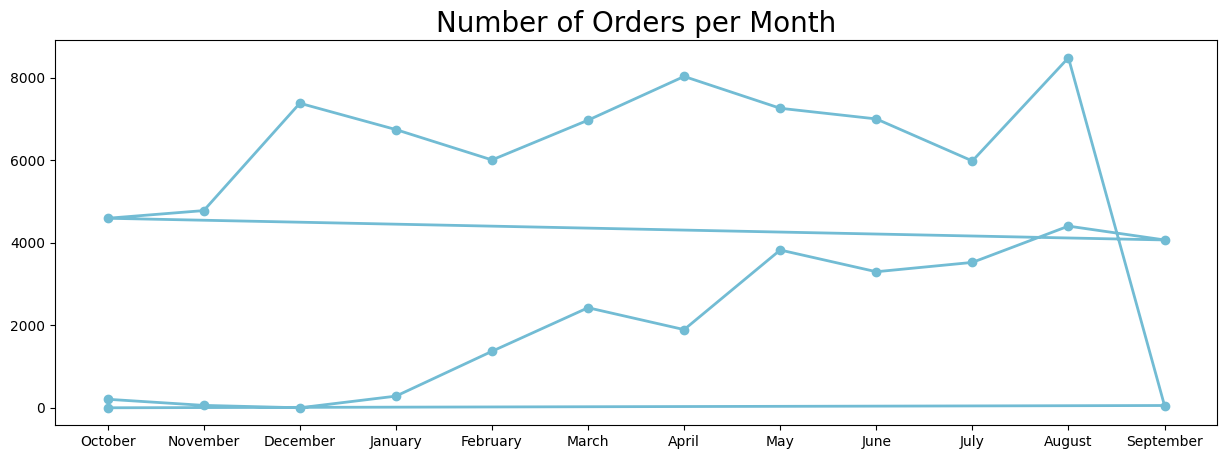

In [74]:
montly_order_df = all_df.resample(rule="M", on="order_delivered_customer_date").agg({
    "order_id": "nunique",
    "price_x": "sum"
})
montly_order_df.index = montly_order_df.index.strftime('%B')

montly_order_df = montly_order_df.reset_index()
montly_order_df.rename(columns={
    "order_id": "order_count",
    "price_x": "revenue"
}, inplace=True)

plt.figure(figsize=(15, 5))
plt.plot(montly_order_df["order_delivered_customer_date"], montly_order_df["order_count"], marker='o', linewidth=2, color="#72BCD4")
plt.title("Number of Orders per Month", loc="center", fontsize=20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

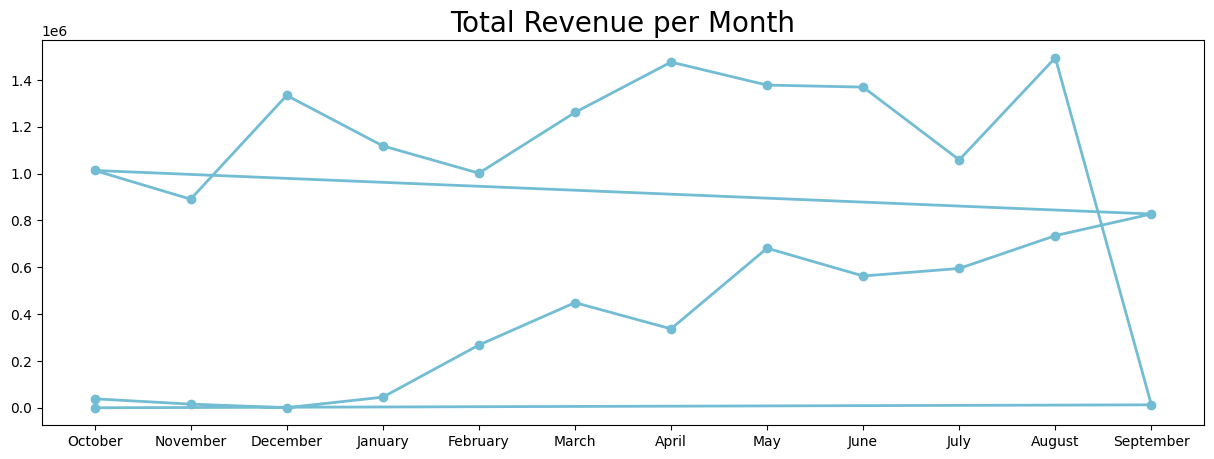

In [75]:
plt.figure(figsize=(15, 5))
plt.plot(
    montly_order_df["order_delivered_customer_date"],
    montly_order_df["revenue"],
    marker='o',
    linewidth=2,
    color="#72BCD4"
)
plt.title("Total Revenue per Month", loc="center", fontsize=20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

### Pertanyaan 2: Produk Apa yang Paling Banyak dan Paling Sedikit Terjual?

In [76]:
sum_order_items_df = all_df.groupby("product_category_name").order_item_id_x.sum().sort_values(ascending=False).reset_index()
sum_order_items_df.head(15)

,product_category_name,order_item_id_x
0,moveis_decoracao,29198
1,cama_mesa_banho,26818
2,informatica_acessorios,24140
3,utilidades_domesticas,22592
4,beleza_saude,21578
5,ferramentas_jardim,15862
6,esporte_lazer,15783
7,automotivo,11001
8,relogios_presentes,10070
9,telefonia,9703


<ipython-input-77-496706f6cbba>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="order_item_id_x", y="product_category_name", data=sum_order_items_df.head(5), palette=colors, ax=ax[0])
<ipython-input-77-496706f6cbba>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="order_item_id_x", y="product_category_name", data=sum_order_items_df.sort_values(by="order_item_id_x", ascending=True).head(5), palette=colors, ax=ax[1])


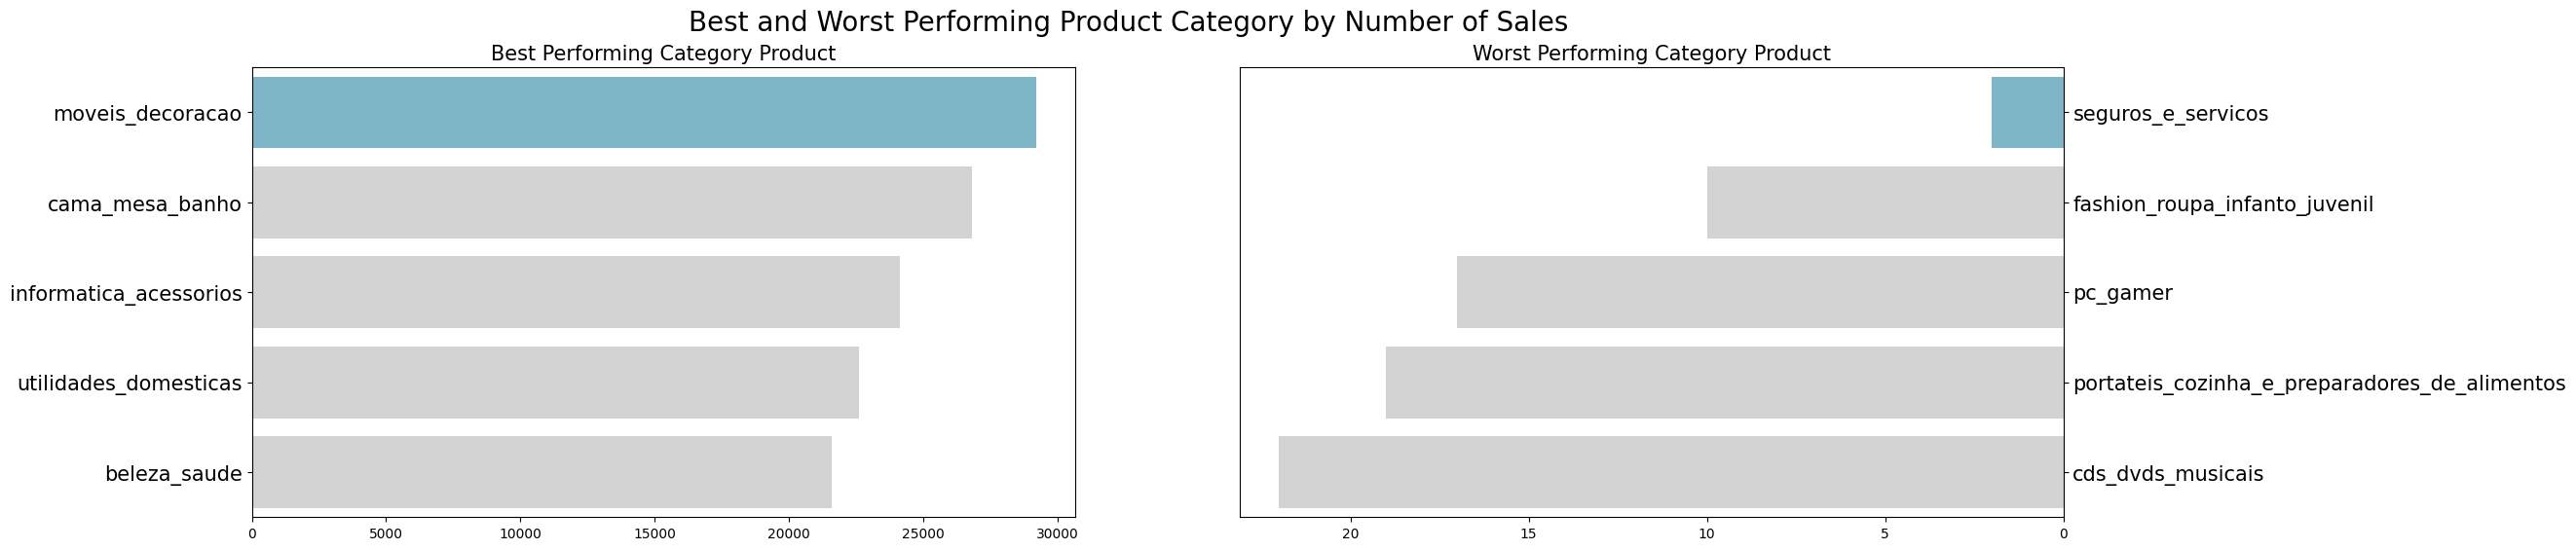

In [77]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(x="order_item_id_x", y="product_category_name", data=sum_order_items_df.head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Best Performing Category Product", loc="center", fontsize=15)
ax[0].tick_params(axis ='y', labelsize=15)

sns.barplot(x="order_item_id_x", y="product_category_name", data=sum_order_items_df.sort_values(by="order_item_id_x", ascending=True).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Worst Performing Category Product", loc="center", fontsize=15)
ax[1].tick_params(axis='y', labelsize=15)

plt.suptitle("Best and Worst Performing Product Category by Number of Sales", fontsize=20)
plt.show()

### Pertanyaan 3: Bagimana Demografi Pengiriman yang Kita Miliki?

<ipython-input-82-9afc43105aae>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-82-9afc43105aae>:8: UserWarning: The palette list has more values (5) than needed (3), which may not be intended.
  sns.barplot(


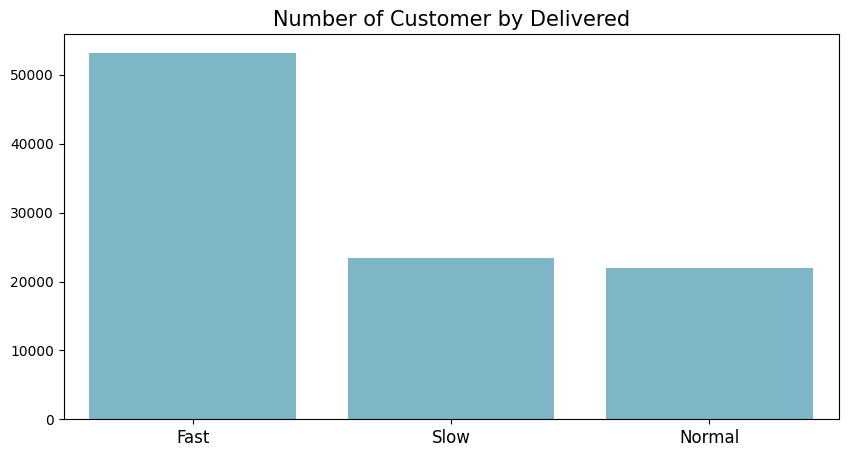

In [82]:
bydelivered_df = all_df.groupby(by="delivery_order_group").customer_id.nunique().reset_index()
bydelivered_df.rename(columns={
    "customer_id": "customer_count"
}, inplace=True)

plt.figure(figsize=(10, 5))

sns.barplot(
    y="customer_count",
    x="delivery_order_group",
    data=bydelivered_df.sort_values(by="customer_count", ascending=False),
    palette=colors
)
plt.title("Number of Customer by Delivered", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=12)
plt.show()

<ipython-input-79-3440435a56bb>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-79-3440435a56bb>:8: UserWarning: 
The palette list has fewer values (8) than needed (27) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(


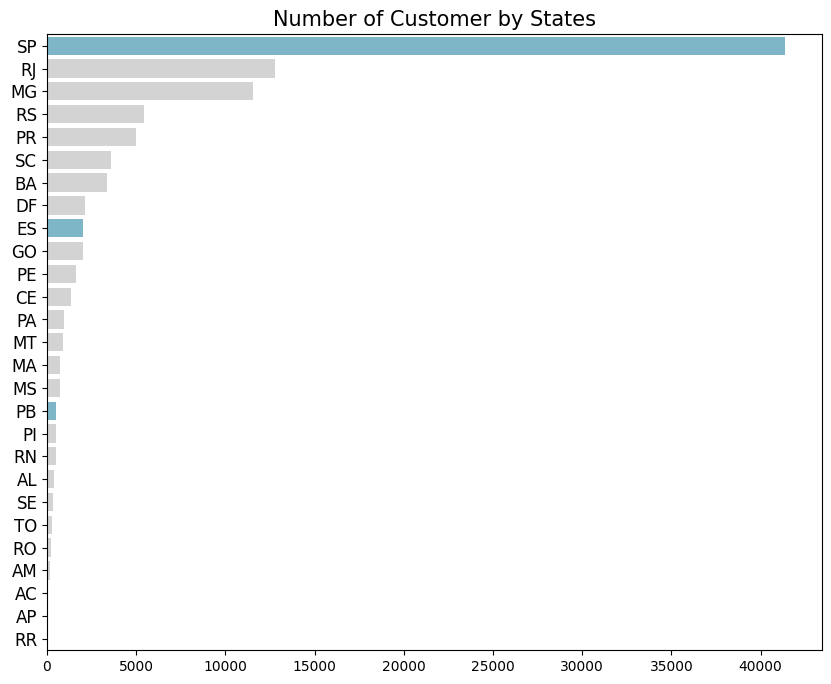

In [79]:
bystate_df = all_df.groupby(by="customer_state").customer_id.nunique().reset_index()
bystate_df.rename(columns={
    "customer_id": "customer_count"
}, inplace=True)
bystate_df
plt.figure(figsize=(10, 8))
colors_ = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
sns.barplot(
    x="customer_count",
    y="customer_state",
    data=bystate_df.sort_values(by="customer_count", ascending=False),
    palette=colors_
)
plt.title("Number of Customer by States", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='y', labelsize=12)
plt.show()

In [80]:
rfm_df = all_df.groupby(by="customer_zip_code_prefix", as_index=False).agg({
    "order_delivered_customer_date": "max", # mengambil tanggal order terakhir
    "order_id": "nunique", # menghitung jumlah order
    "price_x": "sum" # menghitung jumlah revenue yang dihasilkan
})
rfm_df.columns = ["customer_zip_code_prefix", "max_order_timestamp", "frequency", "monetary"]

# menghitung kapan terakhir pelanggan melakukan transaksi (hari)
rfm_df["max_order_timestamp"] = rfm_df["max_order_timestamp"].dt.date
recent_date = orders_df["order_delivered_customer_date"].dt.date.max()
rfm_df["recency"] = rfm_df["max_order_timestamp"].apply(lambda x: (recent_date - x).days)

rfm_df.drop("max_order_timestamp", axis=1, inplace=True)
rfm_df.head()

,customer_zip_code_prefix,frequency,monetary,recency
0,1003,1,89.99,159
1,1004,2,178.99,125
2,1005,6,490.59,58
3,1006,2,834.80,177
4,1007,4,455.48,48


<ipython-input-81-10396886e0fd>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="recency", x="customer_zip_code_prefix", data=rfm_df.sort_values(by="recency", ascending=True).head(5), palette=colors, ax=ax[0])
<ipython-input-81-10396886e0fd>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="frequency", x="customer_zip_code_prefix", data=rfm_df.sort_values(by="frequency", ascending=False).head(5), palette=colors, ax=ax[1])
<ipython-input-81-10396886e0fd>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="monetary", x="customer_zip_cod

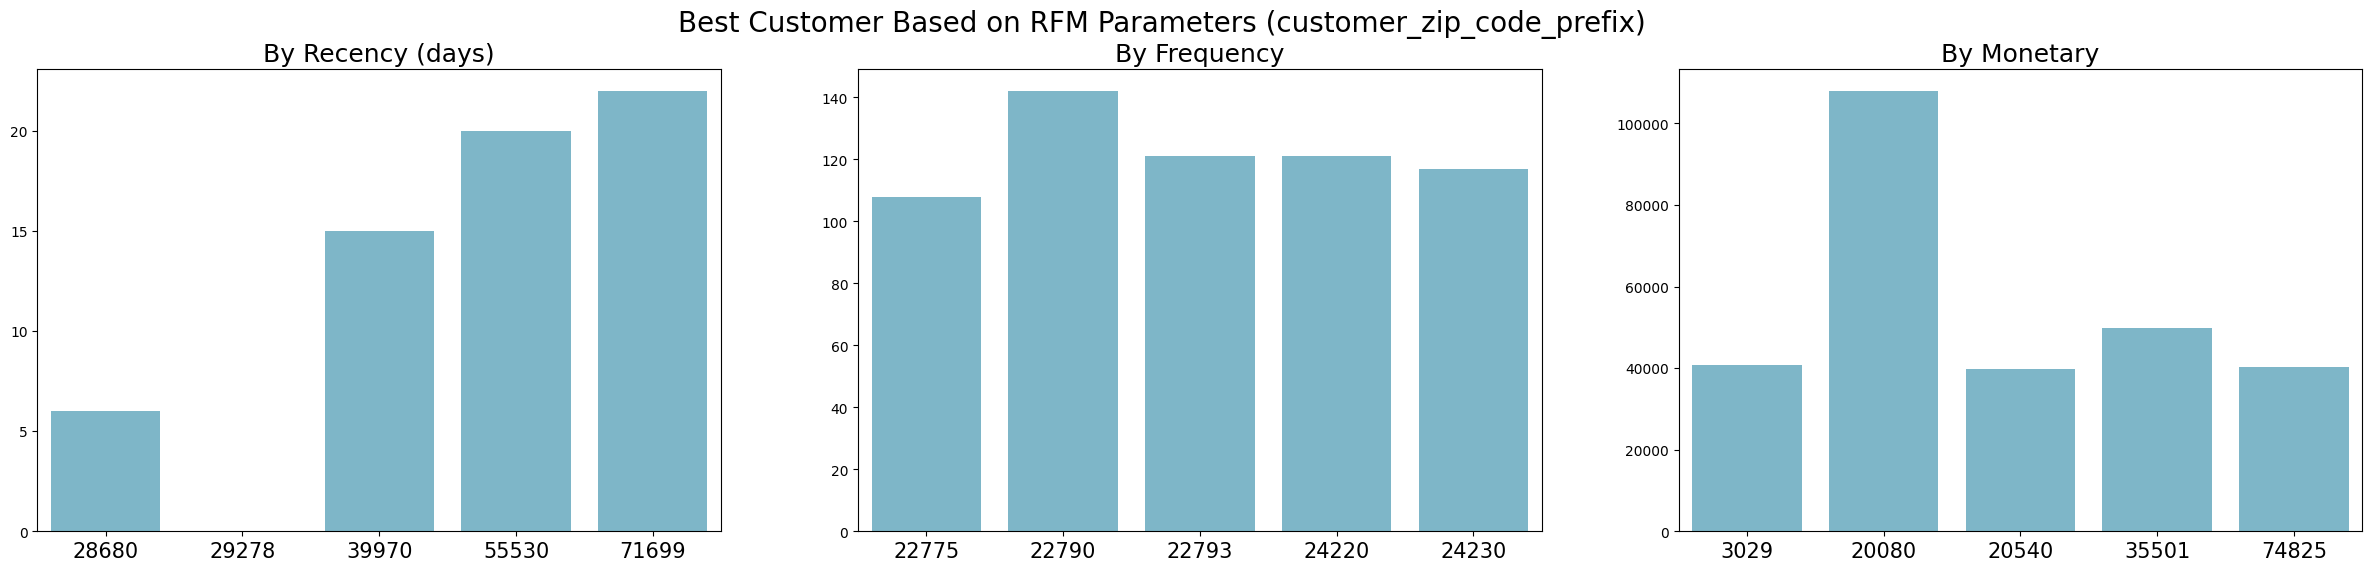

In [81]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 6))

colors = ["#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4"]

sns.barplot(y="recency", x="customer_zip_code_prefix", data=rfm_df.sort_values(by="recency", ascending=True).head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("By Recency (days)", loc="center", fontsize=18)
ax[0].tick_params(axis ='x', labelsize=15)

sns.barplot(y="frequency", x="customer_zip_code_prefix", data=rfm_df.sort_values(by="frequency", ascending=False).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("By Frequency", loc="center", fontsize=18)
ax[1].tick_params(axis='x', labelsize=15)

sns.barplot(y="monetary", x="customer_zip_code_prefix", data=rfm_df.sort_values(by="monetary", ascending=False).head(5), palette=colors, ax=ax[2])
ax[2].set_ylabel(None)
ax[2].set_xlabel(None)
ax[2].set_title("By Monetary", loc="center", fontsize=18)
ax[2].tick_params(axis='x', labelsize=15)

plt.suptitle("Best Customer Based on RFM Parameters (customer_zip_code_prefix)", fontsize=20)
plt.show()

## Conclusion

- Conclution pertanyaan 1

Dari evaluasi data jumlah pembelian e-commerce dari Oktober 2016 hingga September 2018, dapat disimpulkan bahwa ada kecenderungan positif dalam peningkatan keseluruhan pembelian e-commerce. Meskipun terdapat fluktuasi bulanan, peningkatan yang signifikan terjadi terutama pada bulan Maret 2017 dan Mei 2017.

- Conclution pertanyaan 2

Evaluasi produk yang paling banyak terjual merupakan kategori movies_decoracao hal ini terlihat berdasarkan jumlah pembelian yang terjadi dari tahun 2016 hingga 2018, sementara itu untuk produk yang paling sedikit terjual merupakan kategori seguros_e_sevicos.

- Conclution pertanyaan 3

Secara keseluruhan pembelian memiliki variasi yang berbeda-beda terdapat 3 kategori pengiriman cepat, normal, lambat. Sementara itu tercatat untuk pengiriman terbanyak adalah yang tercepat. Untuk pengiriman tercepat berdasarkan customer_state berada pada bagian negara SP